In [104]:
# Import dependencies
from scipy.stats import linregress
from scipy.stats import pearsonr
from matplotlib import pyplot
import pandas as pd
import re

In [57]:
# Read data into dataframe
df = pd.read_csv('Resources/data.csv')

df = df.rename(columns = {
    '% of population with low access' : 'lowAccess',
    '2015 Population Estimate' : 'population',
    'Median Household Income 2015' : 'medInc',
    "% of adults with a bachelor's degree or higher, 2013-17": 'bachelors'
})

In [67]:
# Get user input to determine which state to analyze
state = input('What state would you like to analyze? Please enter the two-digit state code.')

state = state.upper()

# Check if input is two alphabetic characters
if len(state) != 2:
    print('Error! You must enter a two digit state code.')
elif not state.isalpha():
    print ("Error! Only letters a-z allowed!")
else:
    print(f"Great! Let's analyze {state}.")

What state would you like to analyze? Please enter the two-digit state code.co
Great! Let's analyze CO.


In [59]:
# Use input to filter dataframe to specified state
df2 = df[df['State'] == state]

,Unnamed: 0,FIPS,State,County,population,Population with low access,lowAccess,medInc,"Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","% of adults with less than a high school diploma, 2013-17","% of adults with a high school diploma only, 2013-17","% of adults completing some college or associate's degree, 2013-17",bachelors
243,243,8001,CO,Adams,490768,66895.714251,13.630822,62991.0,54006.0,87917.0,97054.0,71613.0,17.4,28.3,31.2,23.1
244,244,8003,CO,Alamosa,16314,915.186239,5.609821,40067.0,1588.0,2367.0,2987.0,2469.0,16.9,25.2,31.7,26.2
245,245,8005,CO,Arapahoe,630637,69481.673398,11.017697,67062.0,32522.0,87155.0,126608.0,175266.0,7.7,20.7,30.0,41.6
246,246,8007,CO,Archuleta,12393,3600.901552,29.055931,50361.0,902.0,2210.0,2869.0,3508.0,9.5,23.3,30.2,37.0
247,247,8009,CO,Baca,3553,955.224505,26.885013,35405.0,379.0,695.0,976.0,558.0,14.5,26.6,37.4,21.4


In [65]:
# Print summary statistics

print(f'Here are the summary statistics of for {state}.')
print('-----------------------------------------------------------')
print(f'The average % of people with low access to food in {state} is {round(df2["lowAccess"].mean())}%.')
print(f'The median income in {state} is ${round(df2["medInc"].mean())}.')
print(f'The average % of people with a bachelor degree or higher in {state} is {round(df2["bachelors"].mean())}%.')
print(f'The total estimated population in {state} is {df2["population"].sum()}.')

Here are the summary statistics of for COO.
-----------------------------------------------------------
The average % of people with low access to food in COO is 24%.
The median income in COO is $53811.
The average % of people with a bachelor degree or higher in COO is 31%.
The total estimated population in COO is 5452107.


The correlation coefficient between Food Access and Population is -0.15293832149846023.
The correlation coefficient between Food Access and Median Income is -0.3017701876017065.
The correlation coefficient between Food Access and Bachelors Degree Proportion is -0.28483901555030666.


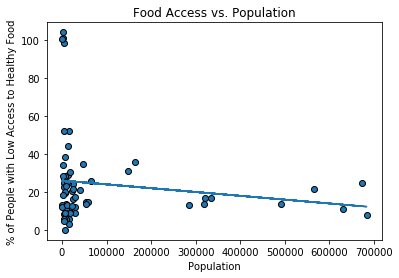

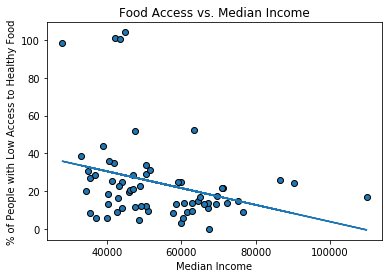

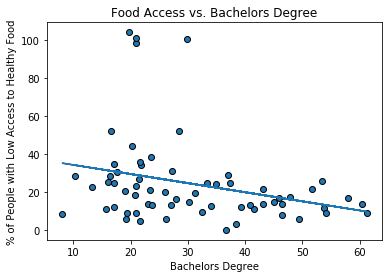

In [107]:
# Create function calculate correlation and create scatterplot for each dependent variable

def analyze(arg):
    
    # Calculate and print Pearson correlation coefficients for each variable
    print(f'The correlation coefficient between Food Access and Population is {pearsonr(df2["lowAccess"],df2["population"])[0]}.')
    print(f'The correlation coefficient between Food Access and Median Income is {pearsonr(df2["lowAccess"],df2["medInc"])[0]}.')
    print(f'The correlation coefficient between Food Access and Bachelors Degree Proportion is {pearsonr(df2["lowAccess"],df2["bachelors"])[0]}.')
    
    # Create scatterplot for each variable
    access = df2['lowAccess']
    
    variableDict = {
        'Population' : df2['population'],
        'Median Income' : df2['medInc'],
        'Bachelors Degree' : df2['bachelors']
    }
    
    for key,value in variableDict.items():
        # Save plot as figure to iterate through dictionary
        pyplot.figure()
       
        # Create scatterplot for each variable
        pyplot.scatter(value, access, edgecolors = 'black')
        pyplot.title(f'Food Access vs. {key}')
        pyplot.xlabel(key)
        pyplot.ylabel('% of People with Low Access to Healthy Food')
        pyplot
        
        # Create regression line for each variable
        x_values = value
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, access)
        regress_values = x_values * slope + intercept
        pyplot.plot(x_values,regress_values)
    
analyze(state)